In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *

In [87]:
initial = pd.read_excel(r"data\\191022_Areas1-7.xlsx",sheet_name='191022_Area1_file01', header=0) # index_col = 0
initial

,baseline,wave_01,wave_02,wave_03,wave_04,wave_05,wave_06,wave_07,wave_08,wave_09,...,wave_209,wave_210,wave_211,wave_212,wave_213,wave_214,wave_215,wave_216,wave_217,wave_218
0,32846.297,32982.445,33032.375,32959.250,33001.668,33000.422,33091.547,33152.734,33047.629,32947.098,...,33177.488,33135.418,33396.445,33001.648,33171.391,33251.223,33136.805,32959.672,33014.211,33118.734
1,32842.215,33074.027,33130.891,32992.352,33028.074,33033.352,33119.387,33462.113,33026.922,33180.422,...,33156.156,33141.109,33379.043,32994.086,33229.000,33267.715,33117.043,33009.406,33029.355,33147.586
2,32845.934,33047.930,33085.668,33025.418,33027.449,33040.270,33117.754,33332.820,33043.223,33230.812,...,33163.090,33164.188,33360.617,33009.027,33301.312,33243.184,33086.523,33023.918,33034.473,33184.266
3,32857.578,33030.766,33101.281,33047.785,33025.520,33030.277,33121.340,33306.172,33067.336,33304.668,...,33141.266,33162.793,33366.680,32991.016,33351.324,33250.766,33129.523,32997.203,33067.043,33145.375
4,32842.379,33053.254,33116.555,33038.617,33047.004,33056.000,33126.121,33259.918,33055.727,33301.488,...,33133.590,33130.793,33300.680,32993.109,33357.609,33259.559,33111.086,33001.652,33051.410,33183.895
5,32841.289,33039.293,33110.059,33086.719,33037.184,33048.211,33140.293,33211.762,33033.750,33315.590,...,33141.500,33182.691,33271.789,32995.172,33440.676,33280.805,33141.543,33017.223,33066.898,33163.281
6,32850.734,33031.871,33111.785,33078.465,33037.434,33083.422,33134.398,33167.871,33048.816,33320.262,...,33174.898,33148.746,33284.766,33000.008,33426.066,33265.844,33131.871,33008.836,33068.410,33208.625
7,32863.266,33034.055,33120.691,33105.957,33032.531,33053.750,33135.105,33154.836,33049.844,33327.109,...,33136.488,33153.352,33306.340,33004.051,33485.145,33249.223,33110.043,32981.879,33070.398,33196.238
8,32839.770,33041.918,33094.422,33122.922,33040.445,33045.688,33113.375,33149.102,33057.293,33321.020,...,33181.590,33149.969,33362.680,32997.059,33514.398,33263.570,33114.109,32994.512,33082.609,33226.945
9,32839.504,33045.891,33106.414,33143.758,33038.629,33062.855,33111.688,33128.602,33054.719,33327.301,...,33142.145,33119.328,33321.320,33011.922,33515.617,33300.105,33107.281,33005.348,33085.816,33229.027


In [88]:
n = frameToSecDF(initial.sub(initial['baseline'], axis = 'rows').drop('baseline', axis = 1).T)
n

,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
wave_01,136.148,231.812,201.996,173.188,210.875,198.004,181.137,170.789,202.148,206.387,...,163.023,169.472,159.293,134.871,168.859,159.421,161.875,157.445,154.157,143.750
wave_02,186.078,288.676,239.734,243.703,274.176,268.770,261.051,257.425,254.652,266.910,...,217.312,233.976,226.957,216.484,228.230,219.386,218.691,229.523,216.836,209.394
wave_03,112.953,150.137,179.484,190.207,196.238,245.430,227.731,242.691,283.152,304.254,...,175.055,170.160,186.028,154.777,188.800,171.410,162.020,186.808,187.305,162.016
wave_04,155.371,185.859,181.515,167.942,204.625,195.895,186.700,169.265,200.675,199.125,...,170.590,198.347,202.395,180.019,193.203,169.144,179.156,192.379,197.301,167.098
wave_05,154.125,191.137,194.336,172.699,213.621,206.922,232.688,190.484,205.918,223.351,...,185.441,184.058,176.891,173.554,195.824,162.968,161.078,187.285,178.067,149.297
wave_06,245.250,277.172,271.820,263.762,283.742,299.004,283.664,271.839,273.605,272.184,...,201.711,246.175,219.672,189.339,239.925,220.914,206.742,227.015,227.496,186.773
wave_07,306.437,619.898,486.886,448.594,417.539,370.473,317.137,291.570,309.332,289.098,...,290.586,320.531,320.539,275.316,279.234,267.707,269.086,297.601,257.227,255.227
wave_08,201.332,184.707,197.289,209.758,213.348,192.461,198.082,186.578,217.523,215.215,...,258.980,261.531,279.204,260.078,277.519,270.039,248.078,263.230,281.438,239.246
wave_09,100.801,338.207,384.878,447.090,459.109,474.301,469.528,463.843,481.250,487.797,...,173.344,185.277,204.215,168.539,196.527,211.980,232.277,201.070,169.703,197.691
wave_10,281.047,300.930,305.718,304.266,340.699,306.652,317.153,313.589,331.718,316.902,...,304.891,318.570,319.774,293.863,306.089,298.906,302.828,307.136,300.575,299.680


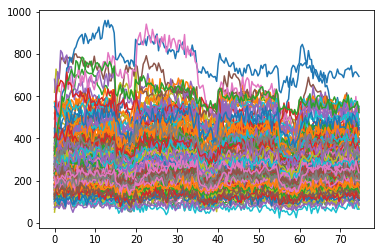

In [89]:
n.T.plot(legend=False)

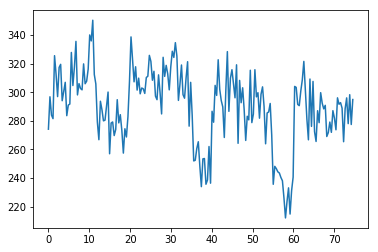

In [90]:
n.T['wave_200'].plot()

# Removal

In [91]:
a = [a - b > 70 for a, b in zip(list(n.max(axis = 1)), list(n.min(axis= 0)))]
dropped = []
for i in range(len(a)):
    if not a[i]:
        dropped.append(list(n.T)[i])
dropped

['wave_85', 'wave_123', 'wave_167', 'wave_168', 'wave_190', 'wave_195']

In [92]:
n = n.drop(dropped, axis = 0)
n

,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
wave_01,136.148,231.812,201.996,173.188,210.875,198.004,181.137,170.789,202.148,206.387,...,163.023,169.472,159.293,134.871,168.859,159.421,161.875,157.445,154.157,143.750
wave_02,186.078,288.676,239.734,243.703,274.176,268.770,261.051,257.425,254.652,266.910,...,217.312,233.976,226.957,216.484,228.230,219.386,218.691,229.523,216.836,209.394
wave_03,112.953,150.137,179.484,190.207,196.238,245.430,227.731,242.691,283.152,304.254,...,175.055,170.160,186.028,154.777,188.800,171.410,162.020,186.808,187.305,162.016
wave_04,155.371,185.859,181.515,167.942,204.625,195.895,186.700,169.265,200.675,199.125,...,170.590,198.347,202.395,180.019,193.203,169.144,179.156,192.379,197.301,167.098
wave_05,154.125,191.137,194.336,172.699,213.621,206.922,232.688,190.484,205.918,223.351,...,185.441,184.058,176.891,173.554,195.824,162.968,161.078,187.285,178.067,149.297
wave_06,245.250,277.172,271.820,263.762,283.742,299.004,283.664,271.839,273.605,272.184,...,201.711,246.175,219.672,189.339,239.925,220.914,206.742,227.015,227.496,186.773
wave_07,306.437,619.898,486.886,448.594,417.539,370.473,317.137,291.570,309.332,289.098,...,290.586,320.531,320.539,275.316,279.234,267.707,269.086,297.601,257.227,255.227
wave_08,201.332,184.707,197.289,209.758,213.348,192.461,198.082,186.578,217.523,215.215,...,258.980,261.531,279.204,260.078,277.519,270.039,248.078,263.230,281.438,239.246
wave_09,100.801,338.207,384.878,447.090,459.109,474.301,469.528,463.843,481.250,487.797,...,173.344,185.277,204.215,168.539,196.527,211.980,232.277,201.070,169.703,197.691
wave_10,281.047,300.930,305.718,304.266,340.699,306.652,317.153,313.589,331.718,316.902,...,304.891,318.570,319.774,293.863,306.089,298.906,302.828,307.136,300.575,299.680


# PCA

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
from importHelpers.response import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>


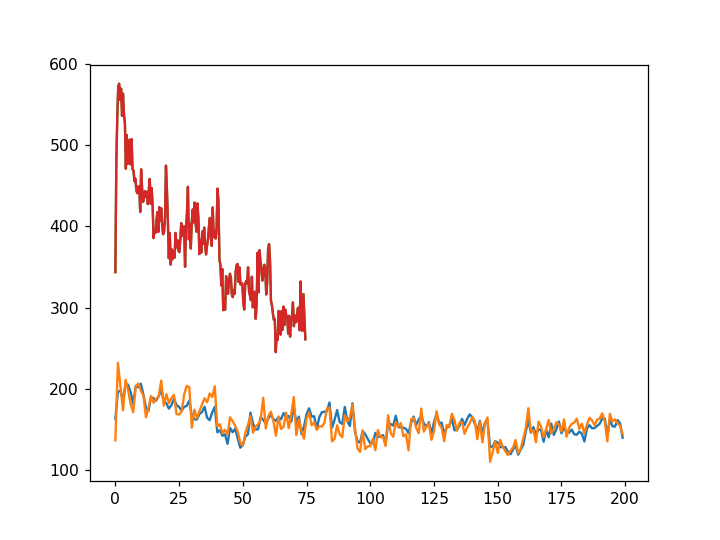

In [98]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(n)
principalDf = pd.DataFrame(data = principalComponents)
p = list(pca.inverse_transform(principalComponents)[0])
b = list(n.iloc[0])
%matplotlib notebook
plt2 = plt.figure()
plt.plot(p)
plt.plot(b)
plt.show()

# DBSCAN

In [99]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [124]:
db = DBSCAN(eps=500, min_samples=2).fit(n)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dlabels = db.labels_
dlabels + 1

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 4,
       1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 5, 1, 1, 1, 1, 0, 1, 1, 6, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 6, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

In [125]:
data = {'in': list(n.index), 'out': list(dlabels + 1)}
doutdf = pd.DataFrame.from_dict(data)
doutdf

,in,out
0,wave_01,1
1,wave_02,1
2,wave_03,1
3,wave_04,1
4,wave_05,1
5,wave_06,1
6,wave_07,0
7,wave_08,1
8,wave_09,0
9,wave_10,1


In [129]:
list(doutdf.loc[doutdf['out'] == 1]['in'])

['wave_01',
 'wave_02',
 'wave_03',
 'wave_04',
 'wave_05',
 'wave_06',
 'wave_08',
 'wave_10',
 'wave_11',
 'wave_12',
 'wave_13',
 'wave_14',
 'wave_15',
 'wave_16',
 'wave_19',
 'wave_20',
 'wave_25',
 'wave_26',
 'wave_27',
 'wave_28',
 'wave_29',
 'wave_30',
 'wave_31',
 'wave_32',
 'wave_33',
 'wave_35',
 'wave_36',
 'wave_40',
 'wave_41',
 'wave_42',
 'wave_43',
 'wave_44',
 'wave_45',
 'wave_47',
 'wave_49',
 'wave_50',
 'wave_51',
 'wave_55',
 'wave_56',
 'wave_57',
 'wave_58',
 'wave_59',
 'wave_60',
 'wave_61',
 'wave_62',
 'wave_63',
 'wave_65',
 'wave_66',
 'wave_67',
 'wave_68',
 'wave_71',
 'wave_72',
 'wave_73',
 'wave_74',
 'wave_76',
 'wave_77',
 'wave_79',
 'wave_80',
 'wave_84',
 'wave_86',
 'wave_87',
 'wave_88',
 'wave_89',
 'wave_90',
 'wave_91',
 'wave_92',
 'wave_93',
 'wave_94',
 'wave_96',
 'wave_97',
 'wave_98',
 'wave_99',
 'wave_100',
 'wave_101',
 'wave_102',
 'wave_103',
 'wave_105',
 'wave_107',
 'wave_108',
 'wave_109',
 'wave_110',
 'wave_112',
 'wave

In [130]:
max(doutdf['out'])

6

In [144]:
n.T[['wave_01', 'wave_02']].T

,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
wave_01,136.148,231.812,201.996,173.188,210.875,198.004,181.137,170.789,202.148,206.387,...,163.023,169.472,159.293,134.871,168.859,159.421,161.875,157.445,154.157,143.750
wave_02,186.078,288.676,239.734,243.703,274.176,268.770,261.051,257.425,254.652,266.910,...,217.312,233.976,226.957,216.484,228.230,219.386,218.691,229.523,216.836,209.394


<IPython.core.display.Javascript object>


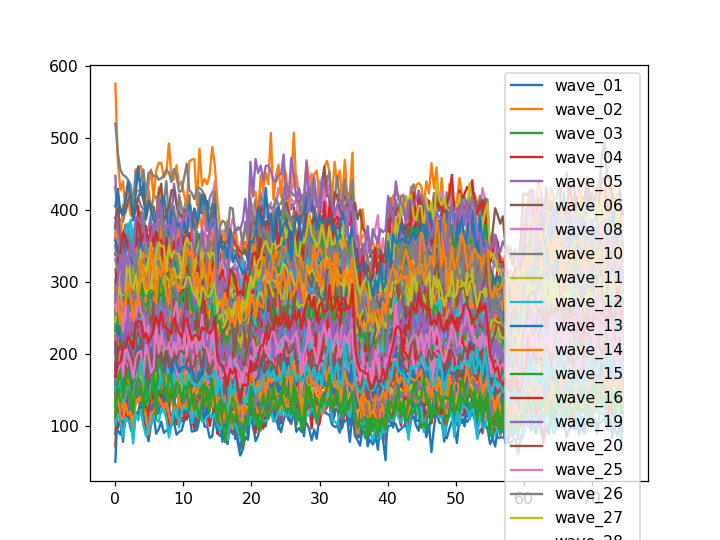

<IPython.core.display.Javascript object>


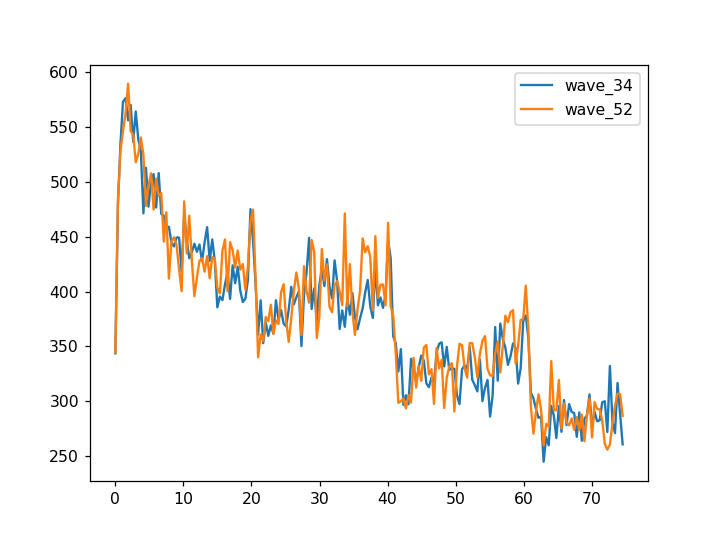

<IPython.core.display.Javascript object>


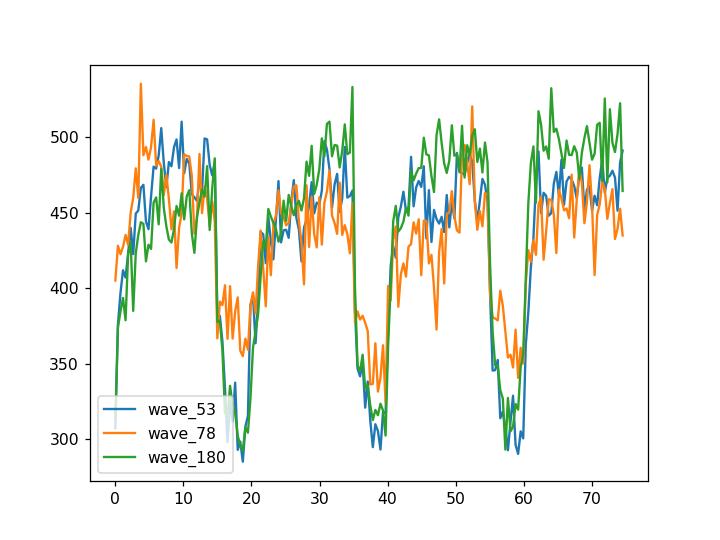

<IPython.core.display.Javascript object>


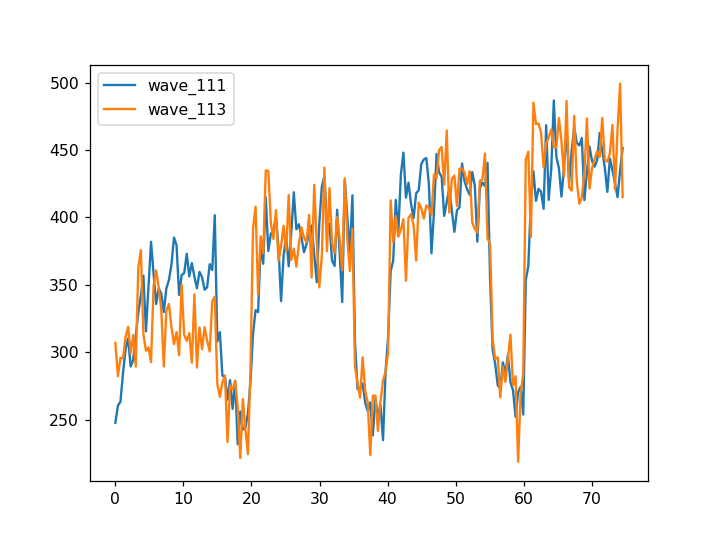

<IPython.core.display.Javascript object>


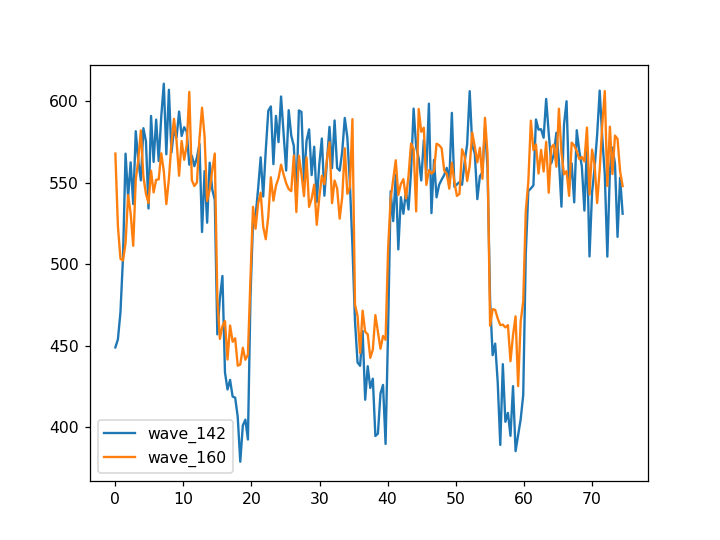

<IPython.core.display.Javascript object>


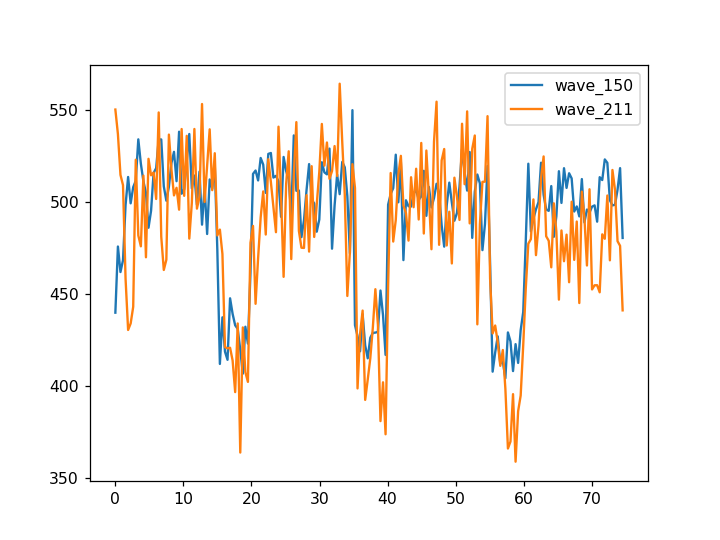

In [160]:
for i in range(1, max(doutdf['out']) + 1):
    z = n.T[list(doutdf.loc[doutdf['out'] == i]['in'])].T
    z.T.plot()

<IPython.core.display.Javascript object>


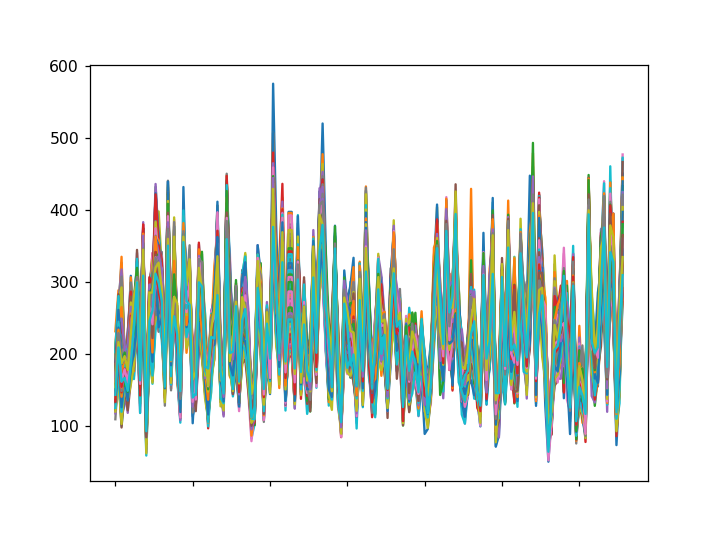

In [147]:
z = n.T[list(doutdf.loc[doutdf['out'] == 1]['in'])].T
z.plot(legend=False)

<IPython.core.display.Javascript object>


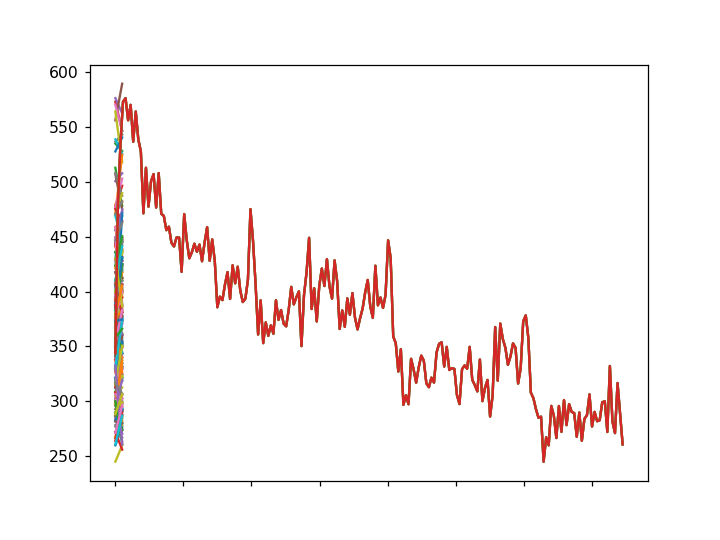

In [148]:
z = n.T[list(doutdf.loc[doutdf['out'] == 2]['in'])].T
z.plot(legend=False)

In [149]:
list(doutdf.loc[doutdf['out'] == 2]['in'])

['wave_34', 'wave_52']

<IPython.core.display.Javascript object>


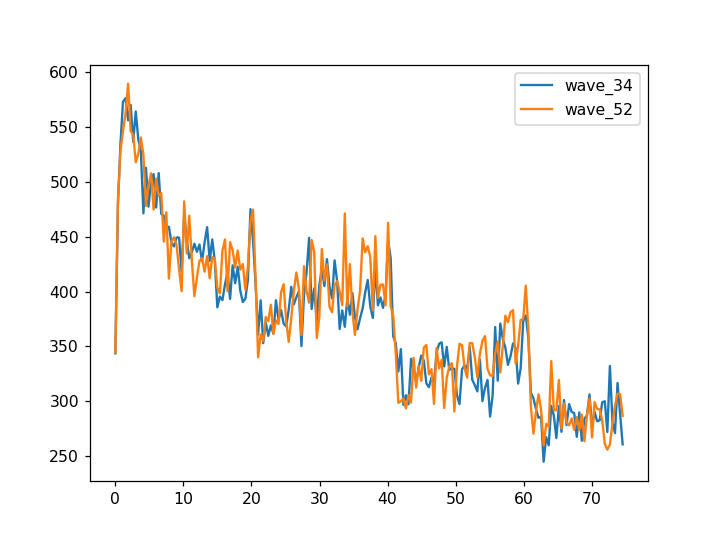

In [159]:
%matplotlib notebook
z = n.T[['wave_34', 'wave_52']].T
z.T.plot()